In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(84.17306752675341, 66.46566715201232),
 (51.46255688916406, 26.56479667232682),
 (-0.5422640912810976, -63.327900138211405),
 (-1.8772603731620165, -54.498658972837205),
 (-66.49330431718985, 74.69380202923838),
 (81.19902581513853, 133.2937221172494),
 (6.086906998026791, -22.14106787031477),
 (-23.948742436921194, -9.533758158930851),
 (-47.43888003161786, -86.84265427775003),
 (15.416057419514374, 104.04575645664806),
 (-26.502385180979473, -51.10937660271034),
 (-20.710455020191063, -2.9082184928777792),
 (86.37693901310999, 179.78606394853676),
 (39.034656510588434, -5.682760613267135),
 (39.893958219646805, 90.76609625686484),
 (-87.8941497584238, 116.56286916165357),
 (-52.362807462831185, 54.23132436026066),
 (-53.73483166655113, 104.11434629425719),
 (11.229802189678807, 57.952874134778995),
 (-62.63868737715494, -50.853793764919004),
 (-83.72950047836052, 137.74989029677738),
 (-71.87910443620825, 143.37565670007695),
 (64.9304949497789, 143.9636485978287),
 (21.37927147444

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [25]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [13]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amderma
City not found. Skipping...
Processing Record 2 of Set 1 | dubrovytsya
Processing Record 3 of Set 1 | barcelos
Processing Record 4 of Set 1 | alenquer
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 1 | bubaque
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | suwannaphum
Processing Record 11 of Set 1 | porto uniao
Processing Record 12 of Set 1 | leningradskiy
Processing Record 13 of Set 1 | villanueva de la serena
Processing Record 14 of Set 1 | hami
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | bargal
City not found. Skipping...
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 

Processing Record 37 of Set 4 | rawson
Processing Record 38 of Set 4 | mormugao
Processing Record 39 of Set 4 | kasaragod
Processing Record 40 of Set 4 | butaritari
Processing Record 41 of Set 4 | upernavik
Processing Record 42 of Set 4 | pafos
Processing Record 43 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 44 of Set 4 | arantangi
Processing Record 45 of Set 4 | brookhaven
Processing Record 46 of Set 4 | vestmannaeyjar
Processing Record 47 of Set 4 | hailar
Processing Record 48 of Set 4 | killybegs
Processing Record 49 of Set 4 | bethel
Processing Record 50 of Set 4 | yola
Processing Record 1 of Set 5 | zhanaozen
Processing Record 2 of Set 5 | khatanga
Processing Record 3 of Set 5 | taltal
Processing Record 4 of Set 5 | sechura
Processing Record 5 of Set 5 | esperance
Processing Record 6 of Set 5 | wawa
Processing Record 7 of Set 5 | batemans bay
Processing Record 8 of Set 5 | guerrero negro
Processing Record 9 of Set 5 | tumannyy
City not found. Skipping

Processing Record 28 of Set 8 | almaznyy
Processing Record 29 of Set 8 | taburao
City not found. Skipping...
Processing Record 30 of Set 8 | itaituba
Processing Record 31 of Set 8 | formosa
Processing Record 32 of Set 8 | levanger
Processing Record 33 of Set 8 | christchurch
Processing Record 34 of Set 8 | toliary
City not found. Skipping...
Processing Record 35 of Set 8 | inta
Processing Record 36 of Set 8 | pangody
Processing Record 37 of Set 8 | morros
Processing Record 38 of Set 8 | porto novo
Processing Record 39 of Set 8 | batagay-alyta
Processing Record 40 of Set 8 | porto-vecchio
Processing Record 41 of Set 8 | eureka
Processing Record 42 of Set 8 | urumqi
Processing Record 43 of Set 8 | bollnas
Processing Record 44 of Set 8 | olinda
Processing Record 45 of Set 8 | itarema
Processing Record 46 of Set 8 | faanui
Processing Record 47 of Set 8 | zhigansk
Processing Record 48 of Set 8 | edeia
Processing Record 49 of Set 8 | auki
Processing Record 50 of Set 8 | ayotzingo
City not fo

Processing Record 13 of Set 12 | kedrovyy
Processing Record 14 of Set 12 | ukiah
Processing Record 15 of Set 12 | benguela
Processing Record 16 of Set 12 | ayer itam
City not found. Skipping...
Processing Record 17 of Set 12 | tambopata
Processing Record 18 of Set 12 | bahia blanca
Processing Record 19 of Set 12 | plainview
Processing Record 20 of Set 12 | babanusah
City not found. Skipping...
Processing Record 21 of Set 12 | eyl
Processing Record 22 of Set 12 | purpe
Processing Record 23 of Set 12 | brindisi
Processing Record 24 of Set 12 | bokoro
Processing Record 25 of Set 12 | monrovia
Processing Record 26 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 27 of Set 12 | puri
Processing Record 28 of Set 12 | sokone
Processing Record 29 of Set 12 | presidencia roque saenz pena
Processing Record 30 of Set 12 | kiama
Processing Record 31 of Set 12 | rodrigues alves
Processing Record 32 of Set 12 | mabai
Processing Record 33 of Set 12 | coihaique
Processing Record 34 o

In [15]:
len(city_data)

564

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dubrovytsya,51.5744,26.5650,37.99,87,100,7.63,UA,2022-04-09 21:31:53
1,Barcelos,41.5388,-8.6151,57.85,96,9,3.83,PT,2022-04-09 21:28:35
2,Alenquer,-1.9417,-54.7383,77.95,89,96,1.88,BR,2022-04-09 21:31:54
3,Saint-Philippe,-21.3585,55.7679,78.22,84,43,11.05,RE,2022-04-09 21:31:54
4,Bubaque,11.2833,-15.8333,76.46,74,22,18.88,GW,2022-04-09 21:31:55
5,Jamestown,42.0970,-79.2353,38.52,46,100,13.80,US,2022-04-09 21:28:29
6,Castro,-24.7911,-50.0119,70.41,73,91,3.20,BR,2022-04-09 21:31:55
7,Suwannaphum,15.6035,103.8021,70.86,49,99,6.38,TH,2022-04-09 21:31:56
8,Porto Uniao,-26.2381,-51.0783,62.92,75,0,2.80,BR,2022-04-09 21:31:56
9,Leningradskiy,69.3833,178.4167,-9.85,85,27,4.03,RU,2022-04-09 21:31:56


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_reorder_df = city_data_df[new_column_order]
city_data_reorder_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dubrovytsya,UA,2022-04-09 21:31:53,51.5744,26.5650,37.99,87,100,7.63
1,Barcelos,PT,2022-04-09 21:28:35,41.5388,-8.6151,57.85,96,9,3.83
2,Alenquer,BR,2022-04-09 21:31:54,-1.9417,-54.7383,77.95,89,96,1.88
3,Saint-Philippe,RE,2022-04-09 21:31:54,-21.3585,55.7679,78.22,84,43,11.05
4,Bubaque,GW,2022-04-09 21:31:55,11.2833,-15.8333,76.46,74,22,18.88


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1649542517.2433074

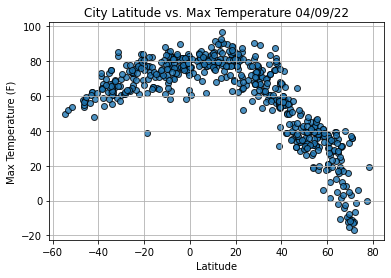

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

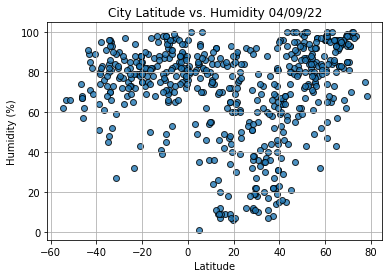

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

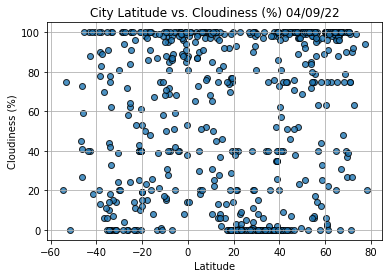

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

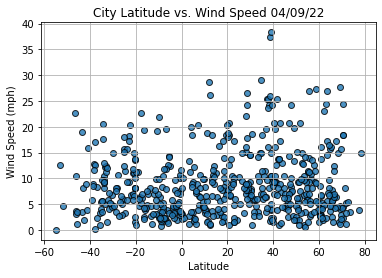

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()